# Exemplo - Multilayer Perceptron com TensorFlow

### Problema: Classificação de flores Iris

Atributos presentes no dataset:
1. comprimento da sépala em cm
2. largura da sépala em cm
3. comprimento da pétala em 'cm
4. largura da pétala em cm
5. classe:
    - Iris Setosa
    - Iris Versicolor
    - Iris Virgínia

#### Objetivo: Classificar uma flor Iris com base em suas medidas


<div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/1200px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="200" height="200" />
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" width="200" height="200" />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1200px-Iris_virginica_2.jpg" width="200" height="200" /> </div>

 Iris Setosa, Iris Versicolor, Iris Virginica, respectivamente.

## 1. Importando bibliotecas

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Carregando dataset

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df = df.dropna()

df[df == '?'].count()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### 2.1. Visualizando as 5 primeiras linhas do dataset

In [ ]:
lista =['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'classe']
df.columns = lista

df.head(5)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['classe'] = df['classe'].astype('category').cat.codes


In [ ]:
input_train, input_test, output_train, output_test = train_test_split(df.iloc[:,0:4], df['classe'], test_size=0.2)

In [ ]:
input_train = pd.DataFrame(input_train)
input_train.to_csv('input_train.csv', index=False)

input_test = pd.DataFrame(input_test)
input_test.to_csv('input_test.csv', index=False)

output_train = pd.DataFrame(output_train)
output_train.to_csv('output_train.csv', index=False)

output_test = pd.DataFrame(output_test)
output_test.to_csv('output_test.csv', index=False)


In [ ]:
## Carregar os dados de treino

input_train = pd.read_csv('input_train.csv')
output_train = pd.read_csv('output_train.csv')

## Balanceamento do dados com SMOTE

In [ ]:
## Balancemento dos dados com SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

input_train_balanced, output_train_balanced = sm.fit_resample(input_train, output_train)

In [ ]:
# Salvar dados balanceados
input_train_balanced.to_csv('input_train_balanced.csv', index=False)
output_train_balanced.to_csv('output_train_balanced.csv', index=False)

In [ ]:
output_train_balanced.value_counts()

classe
0         41
1         41
2         41
Name: count, dtype: int64

### 2.2. Dividindo o dataset em atributos e classes

In [ ]:
classes = df['classe'].unique()

In [ ]:
print(classes)

[0 1 2]


In [ ]:
X = df.iloc[:, 0:4].values # Atributos/Features
y = df['classe'].values # Classes/Labels

## 3. Dividindo o dataset em treino e teste

In [ ]:
# Dividindo os dados em treino e teste em 80% e 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Padronizando os dados de entrada (X) para média 0 e desvio padrão 1
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# Convertendo as classes em valores numéricos
# Uma classe será representada por um vetor de 3 posições, onde apenas uma posição será 1 e as outras 0
# Exemplo: Iris-setosa = [1, 0, 0]
#          Iris-versicolor = [0, 1, 0]
#          Iris-virginica = [0, 0, 1]
# Fazemos isso, pois o algoritmo de aprendizado de máquina espera os dados sejam representadas por valores numéricos
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values


## 4. Criando o modelo

Documentação

https://keras.io/api/layers/activations/ |
https://keras.io/api/layers/core_layers/dense/ |
https://keras.io/api/optimizers/

In [ ]:
# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 3 neurônios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=4, activation='sigmoid', name='oculta'))
model.add(tf.keras.layers.Dense(3, activation='softmax', name='saida'))
model.summary() #visualizando o modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ oculta (Dense)                       │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ saida (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

### 4.1. Compilando o modelo

In [ ]:
# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

### 4.2. Treinando o modelo

In [ ]:
# Train model
history = model.fit(X_train_std, y_train_onehot, validation_split=0.2, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - loss: 1.2005 - mse: 0.2467 - val_loss: 1.0648 - val_mse: 0.2161
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.0163 - mse: 0.2056 - val_loss: 0.8925 - val_mse: 0.1776
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.8947 - mse: 0.1782 - val_loss: 0.7288 - val_mse: 0.1356
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.7795 - mse: 0.1483 - val_loss: 0.6053 - val_mse: 0.1063
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.7013 - mse: 0.1310 - val_loss: 0.5276 - val_mse: 0.0918
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.6088 - mse: 0.1136 - val_loss: 0.4796 - val_mse: 0.0845
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5398 - mse: 0.1005 - val_loss: 0.4257 - val_mse: 0.0746
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5057 - mse: 0.0947 - val_loss: 0.3660 - val_mse: 0.0628
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4553 - ms

## 5. Visualizando o erro

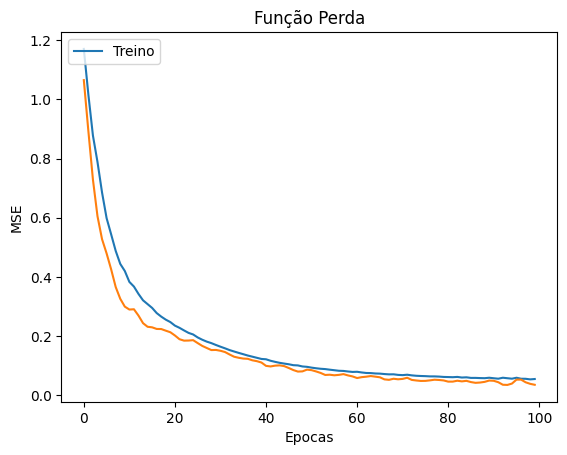

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.yscale("log")
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino'], loc='upper left')
plt.show()


## 6. Métricas: Avaliação do modelo

In [ ]:
output_model_ = np.argmax(model.predict(X_test_std), axis=-1)
y_test_class = np.argmax(y_test_onehot, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


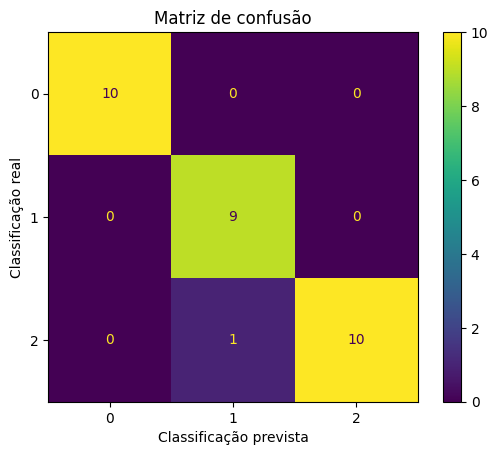

In [ ]:
cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()

## 7. Testando o modelo

In [ ]:
comprimento_sepala=5.1
largura_sepala=3.5
comprimento_petala=1.4
largura_petala=0.2
teste = np.array([[comprimento_sepala, 	largura_sepala, 	comprimento_petala, 	largura_petala]])
teste = sc.transform(teste)

"""
    1 - Iris-setosa
    2 - Iris-versicolor
    3 - Iris-virginica
"""
y_predd = model.predict(teste)
y_predd = np.argmax(y_predd, axis=1)

print("A classe é:", classes[y_predd[-1]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
A classe é: 0


# 8. Explicando o modelo

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.5 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
def model_predict(X):
    return np.argmax(model.predict(X), axis=-1)

In [ ]:
explainer = shap.KernelExplainer(model_predict, X_test_std)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
shap_values = explainer.shap_values(X_test_std)

  0%|          | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━

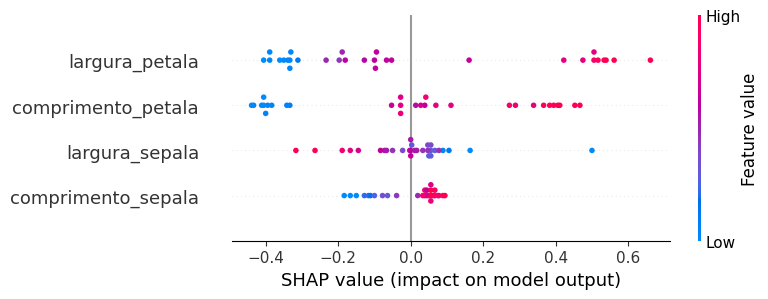

In [ ]:
shap.summary_plot(shap_values, X_test_std,  feature_names=lista)

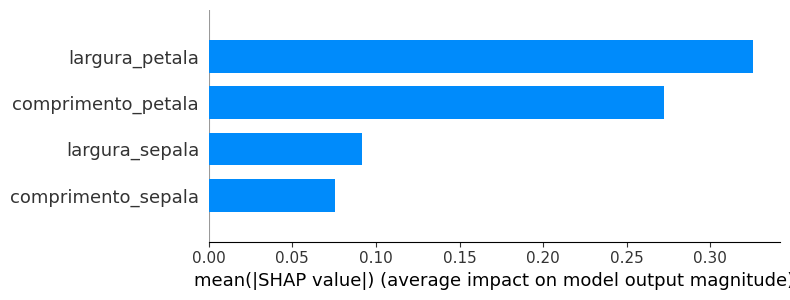

In [ ]:
shap.summary_plot(shap_values, X_test_std,  feature_names=lista, plot_type="bar")

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_std)
